In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/sgsfile/Desktop/data/housing.csv.zip')
# Drop the longitude and latitude 
data = data.drop(columns=['longitude', 'latitude'])


In [3]:
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  float64
 4   households          20640 non-null  float64
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  float64
 7   ocean_proximity     20640 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [5]:
data.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
#reasonable maximum values for each variable
reasonable_max = {
    "housing_median_age": 100,
    "total_rooms": 15000,
    "total_bedrooms": 4000,
    "population": 12000,
    "households": 2000,
    "median_income": 15,  # 
    "median_house_value": 500001,  # 
}
# Cap the values in the dataset
for column, max_value in reasonable_max.items():
    data[column] = data[column].clip(upper=max_value)

# Check the new statistics
data.describe()


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2613.714777,536.960848,1422.660562,492.386337,3.870671,206855.816909
std,12.585558,1998.085768,412.444926,1086.066712,337.735905,1.899820,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,15000.000000,4000.000000,12000.000000,2000.000000,15.000000,500001.000000


In [7]:
#check missing values and fill
data.isnull().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

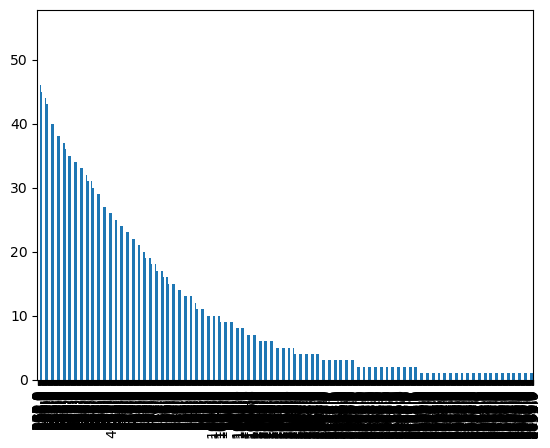

In [8]:
data['total_bedrooms'].value_counts().plot.bar()

In [9]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)

In [10]:
data.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

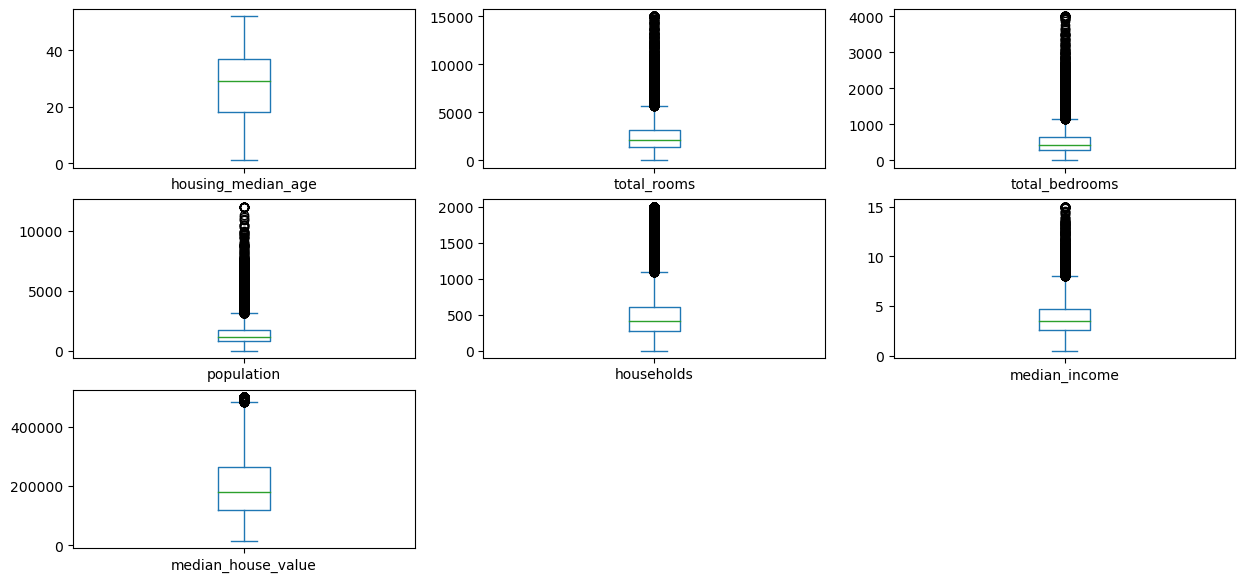

In [11]:
#box plot
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

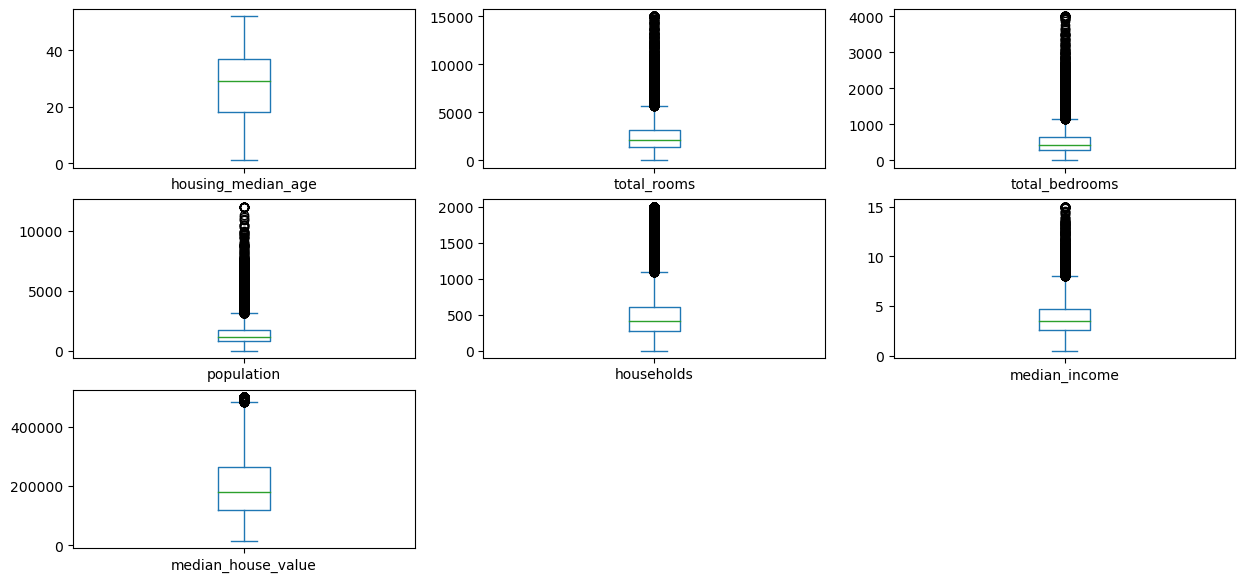

In [12]:
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

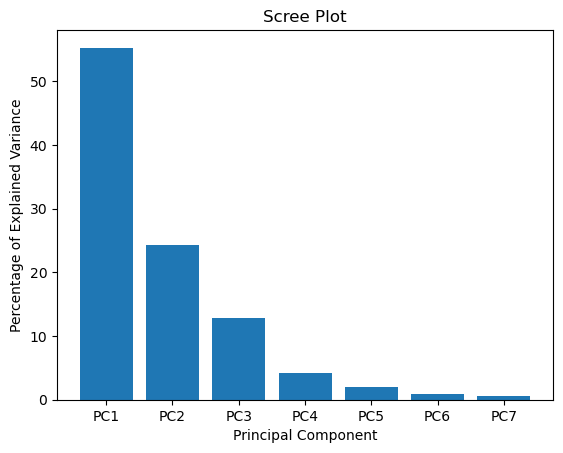

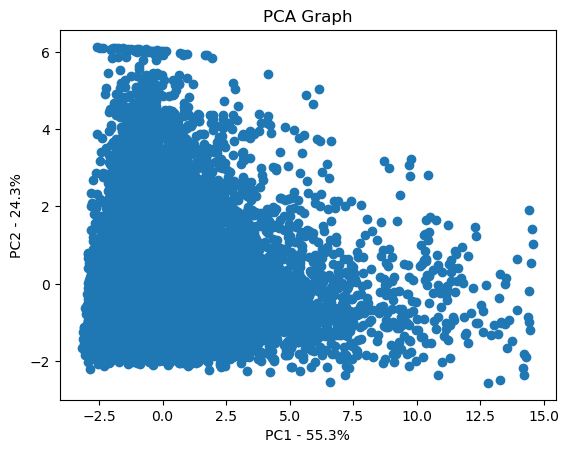

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Exclude the non-numeric column
numeric_data = data.drop(columns=['ocean_proximity'])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(
    pca_data, 
    columns=[f"PC{x+1}" for x in range(pca_data.shape[1])]
)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [f"PC{x+1}" for x in range(len(per_var))]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Graph')
plt.xlabel(f"PC1 - {per_var[0]}%")
plt.ylabel(f"PC2 - {per_var[1]}%")
plt.show()


Top 10 Features for PC1:
total_bedrooms        0.491199
households            0.490480
total_rooms           0.489410
population            0.472433
median_income         0.056823
median_house_value    0.046375
housing_median_age   -0.223737
Name: PC1, dtype: float64


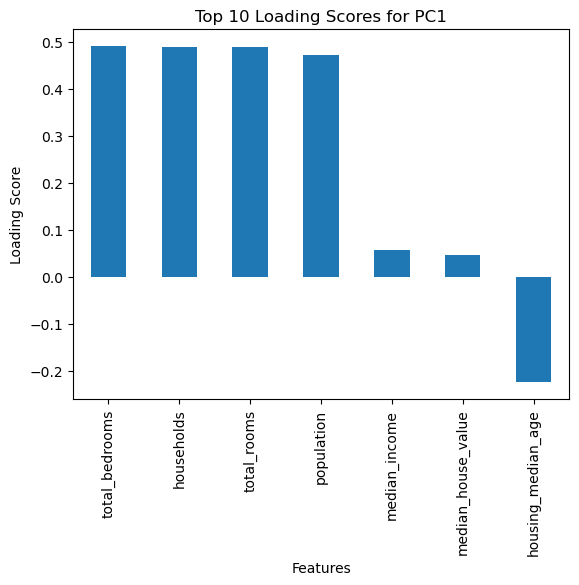

In [14]:
# Get the loading scores (eigenvectors)
loading_scores = pd.DataFrame(pca.components_, 
                               columns=numeric_data.columns, 
                               index=[f"PC{x+1}" for x in range(len(pca.explained_variance_))])

# Display the loading scores for the first principal component (PC1)
pc1_loading_scores = loading_scores.loc["PC1"].sort_values(ascending=False)

# Get the top 10 features with the highest loading scores
top_10_features_pc1 = pc1_loading_scores.head(10)

# Display the top 10 features
print("Top 10 Features for PC1:")
print(top_10_features_pc1)

# Optionally plot the top 10 loading scores for visualization
top_10_features_pc1.plot(kind='bar', title="Top 10 Loading Scores for PC1")
plt.xlabel("Features")
plt.ylabel("Loading Score")
plt.show()


In [15]:
#infromation theory analysis
from scipy.stats import entropy
import numpy as np

# Function to calculate entropy for a variable
def calculate_entropy(column):
    # Discretize continuous data into bins (if needed)
    value_counts = column.value_counts(normalize=True)  # Get probabilities
    return entropy(value_counts, base=2)  # Base-2 for bits

# Calculate entropy for each column in the dataset
entropy_values = {col: calculate_entropy(data[col]) for col in data.columns if data[col].dtype != 'object'}

top_9_entropy = sorted(entropy_values.items(), key=lambda x: x[1], reverse=True)[:13]

top_9_entropy = {k: v for k, v in top_9_entropy}

# Display the top 9 entropy values
print("Top 9 Entropy Values:")
for variable, entropy_val in top_9_entropy.items():
    print(f"{variable}: {entropy_val}")



Top 9 Entropy Values:
median_income: 13.196146332568055
total_rooms: 12.074404562908265
population: 11.374956644219761
median_house_value: 11.106102993951886
total_bedrooms: 10.057773995264412
households: 9.910341898380793
housing_median_age: 5.447660395509785


Mutual Information Scores:
median_income              0.387737
ocean_proximity_encoded    0.210774
total_rooms                0.041204
housing_median_age         0.033797
households                 0.030999
total_bedrooms             0.023837
population                 0.020769
dtype: float64


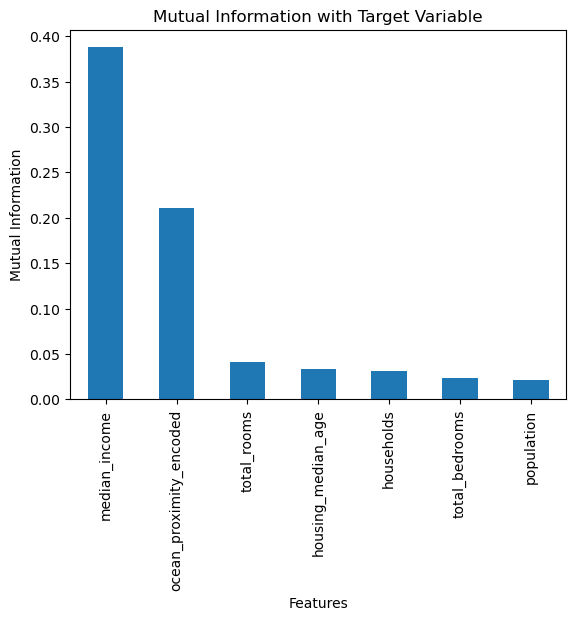

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif  # Import mutual_info_regression and mutual_info_classif

# Encode 'ocean_proximity' using LabelEncoder
if 'ocean_proximity' in data.columns:
    label_encoder = LabelEncoder()
    data['ocean_proximity_encoded'] = label_encoder.fit_transform(data['ocean_proximity'])
    data = data.drop(columns=['ocean_proximity'])  # Drop the original column

# Mutual Information Analysis
target_variable = 'median_house_value'  # Replace with your target column

# Check if target variable is categorical or continuous
if data[target_variable].dtype == 'object':
    mi = mutual_info_classif(data.drop(columns=[target_variable]), data[target_variable])
else:
    mi = mutual_info_regression(data.drop(columns=[target_variable]), data[target_variable])

# Map mutual information scores to feature names
mi_scores = pd.Series(mi, index=data.drop(columns=target_variable).columns).sort_values(ascending=False)

# Display mutual information scores
print("Mutual Information Scores:")
print(mi_scores)

# Optional visualization
import matplotlib.pyplot as plt
mi_scores.plot(kind='bar', title="Mutual Information with Target Variable")
plt.xlabel("Features")
plt.ylabel("Mutual Information")
plt.show()



In [15]:
#show distribution
mapping = {'<1H OCEAN': 1,'INLAND': 2,'NEAR OCEAN': 3,'NEAR BAY':4,'ISLAND':5}
data['ocean_proximity'] = data['ocean_proximity'].map(mapping)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

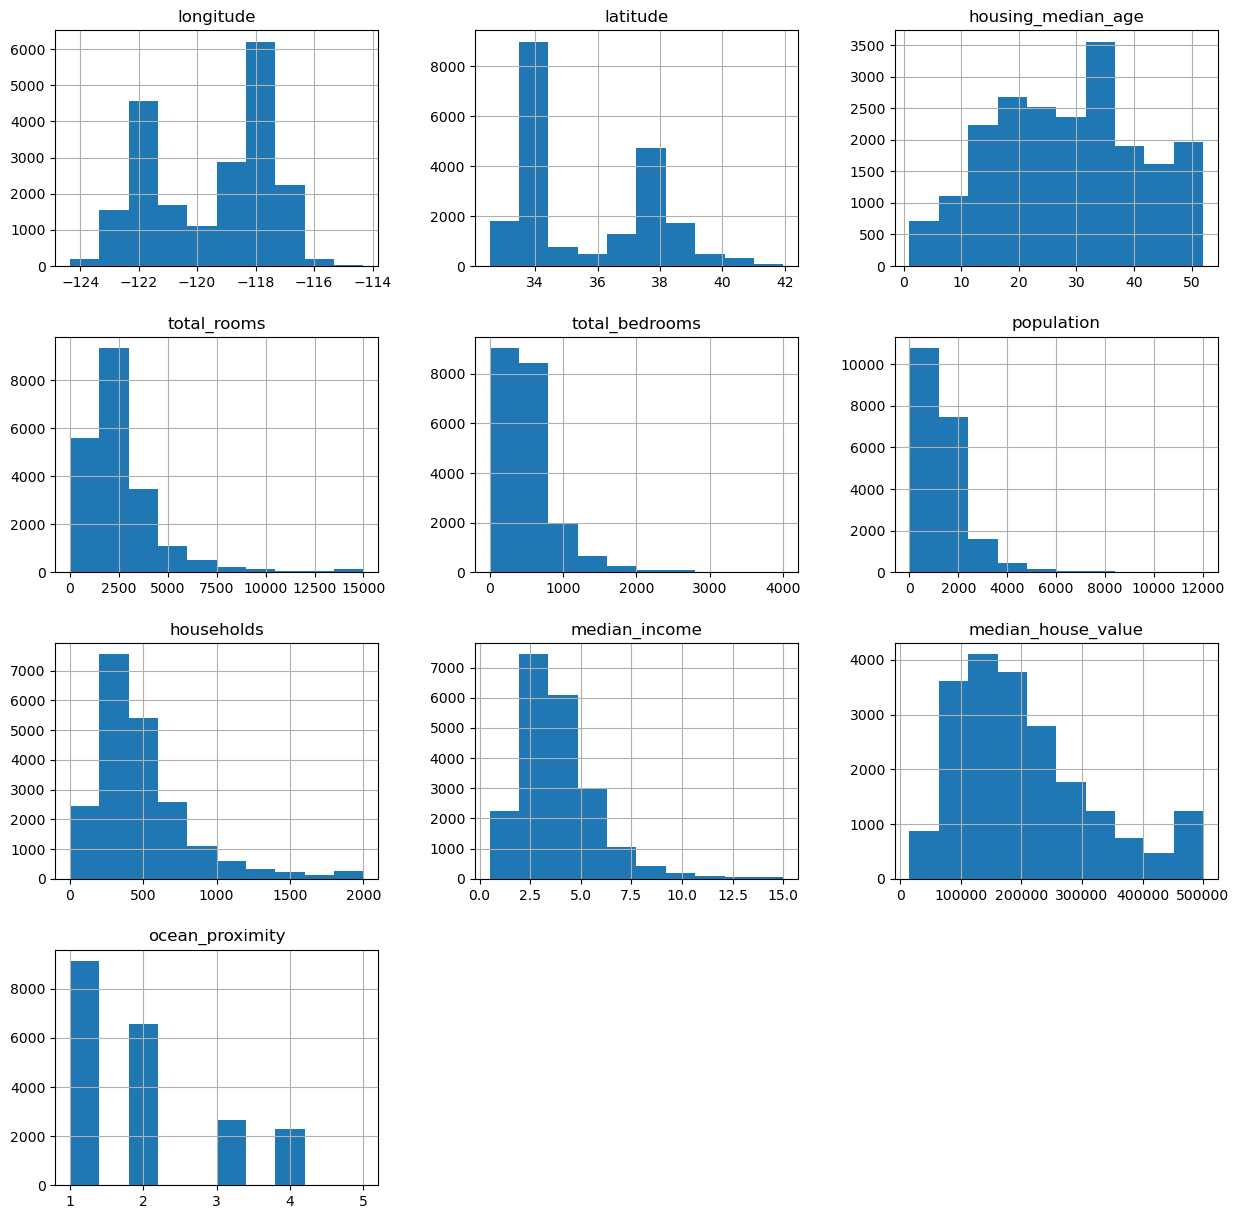

In [16]:
#show distribution
data.hist(figsize=(15, 15))

In [17]:
#correlation analysis 

#turn ocean promixity to dummies 
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], dtype=int)


#add column to data and drop original ocean_proximity
data = data.join(ocean_proximity_dummies)
data.drop(['ocean_proximity'], axis=1, inplace=True)

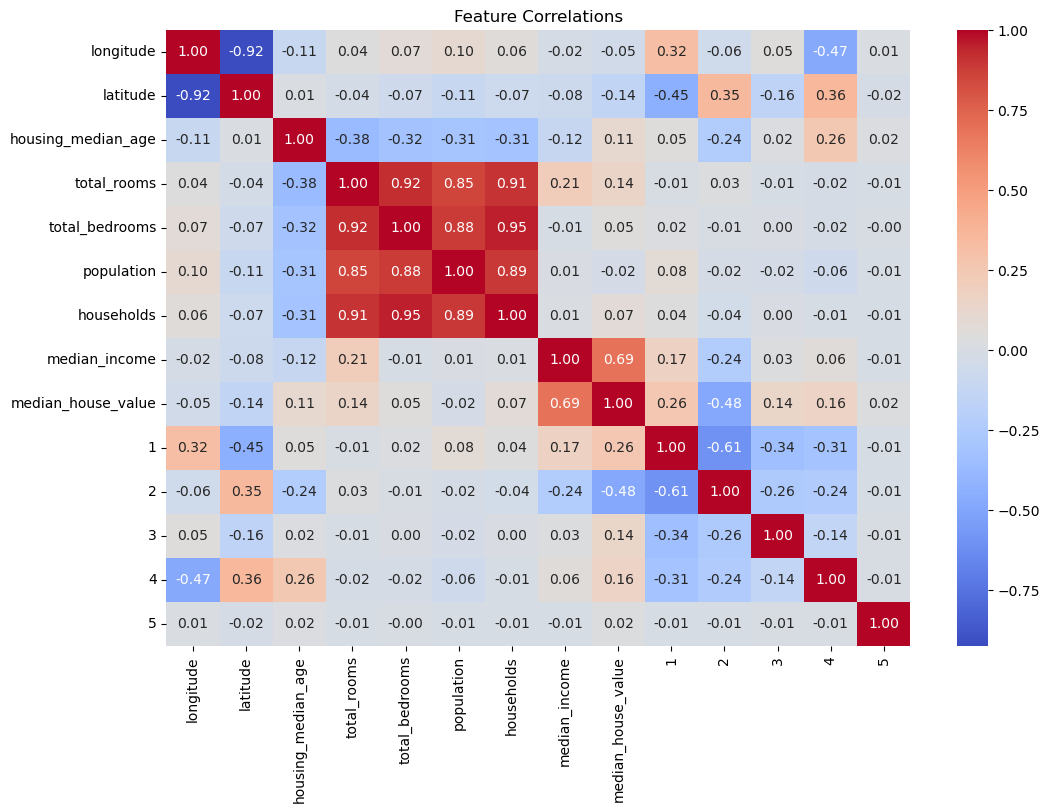

In [18]:
correlations = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

Mean Squared Error: 2147794612.31393
R-squared: 0.8360973827272504


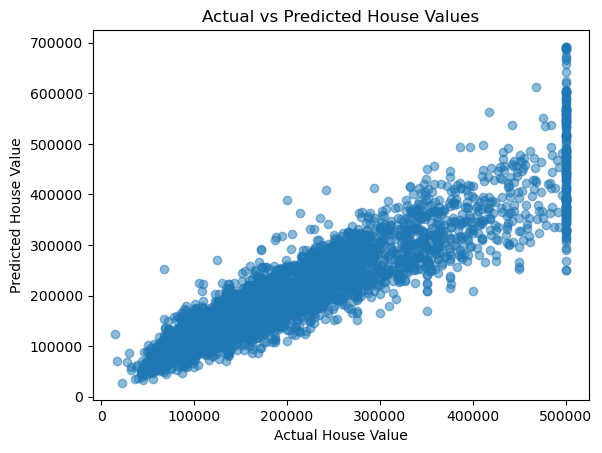

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract the first two principal components
X = pca_data[:, :2]  # PC1 and PC2
y = data['median_house_value']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict house values using the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Values")
plt.show()
